In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/Users/andresfelipemurilloavendano/Documents/2. CASO_Semestre_Analitica 2021-I/DataSetMuestraProyectoKL_v7may2021.txt", 
                 sep = "|", encoding = "latin-1", decimal = ',', error_bad_lines = False, dtype={'a': np.float32})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730042 entries, 0 to 1730041
Data columns (total 81 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   EPS                          int64  
 1   cmdcuentamedica              int64  
 2   prsIDPrestacion              int64  
 3   dprIDDetallePrestacion       int64  
 4   cmdPrefijoFactura            object 
 5   cmdNumeroFactura             int64  
 6   PrNumFactu1                  object 
 7   PrNumFactu2                  object 
 8   cmdFchEmisionFactura         object 
 9   cmdfchradicacion             object 
 10  cmdTotalFactura              float64
 11  FAC_FECH                     object 
 12  FAC_ESTA                     object 
 13  FAC_VATO                     float64
 14  FecPagoReciente              object 
 15  ValTotalPago                 float64
 16  cmdTotalIva                  int64  
 17  cmdTotalReteFuente           int64  
 18  cmdTotalReteIca              int64  
 19  

In [5]:
df.head(5)

,EPS,cmdcuentamedica,prsIDPrestacion,dprIDDetallePrestacion,cmdPrefijoFactura,cmdNumeroFactura,PrNumFactu1,PrNumFactu2,cmdFchEmisionFactura,cmdfchradicacion,...,esContratoEspecial,idNit,CodigoDANEDeptoMunPrestador,dxIDHomolDiag,dxDescripcion,sss1,sss2,ssd1,ssd2,ValUnitAt
0,3,5015177,10935210,34080638,FE,1833,FE1833,FE1833,2020-12-30 00:00:00,2021-01-20 17:24:08.847000000,...,False,702,17001,J441,Enfermedad pulmonar obstructiva cronica con ex...,False,False,False,False,False
1,1,15612717,37049102,122636975,NaN,904882,904882,904882,2020-08-28 00:00:00,2020-09-11 10:11:26.273000000,...,False,762,5154,S500,Contusion del codo,False,False,False,False,True
2,1,15612717,37049102,122636973,NaN,904882,904882,904882,2020-08-28 00:00:00,2020-09-11 10:11:26.273000000,...,False,762,5154,S500,Contusion del codo,False,False,False,False,False
3,1,14219175,34622073,111847983,HDCS,3425458,HDCS3425458,HDCS3425458,2020-02-29 00:00:00,2020-03-16 13:10:05.360000000,...,False,677,76736,J020,Faringitis estreptococica,False,False,False,False,False
4,1,16372641,38155400,127513164,SO,4412959,SO4412959,SO4412959,2020-11-03 00:00:00,2021-01-01 09:37:58.460000000,...,False,359,15753,J189,"Neumonia, no especificada",False,False,False,False,False


In [6]:
df["ValUnitAt"].value_counts()

False    1417076
True      312966
Name: ValUnitAt, dtype: int64

## 312.966 datos atipicos y sospechosos de fraude, encontrados mediante los rangos intercuartilicos y test SSS1, SSS2, SSD1, SSD2, seran marcados con True = 1

## Los demás datos con False = 0

In [7]:
#transformo los datos True y False a 1 y 0 respectivamente
df['ValUnitAt'] = df['ValUnitAt'].astype(int)

In [8]:
df['sss1'] = df['sss1'].astype(int)

In [9]:
df['sss2'] = df['sss2'].astype(int)

In [10]:
df['ssd1'] = df['ssd1'].astype(int)

In [11]:
df['ssd2'] = df['ssd2'].astype(int)

In [12]:
df['esContratoEspecial'] = df['esContratoEspecial'].astype(int)

In [13]:
df.head(3)

,EPS,cmdcuentamedica,prsIDPrestacion,dprIDDetallePrestacion,cmdPrefijoFactura,cmdNumeroFactura,PrNumFactu1,PrNumFactu2,cmdFchEmisionFactura,cmdfchradicacion,...,esContratoEspecial,idNit,CodigoDANEDeptoMunPrestador,dxIDHomolDiag,dxDescripcion,sss1,sss2,ssd1,ssd2,ValUnitAt
0,3,5015177,10935210,34080638,FE,1833,FE1833,FE1833,2020-12-30 00:00:00,2021-01-20 17:24:08.847000000,...,0,702,17001,J441,Enfermedad pulmonar obstructiva cronica con ex...,0,0,0,0,0
1,1,15612717,37049102,122636975,NaN,904882,904882,904882,2020-08-28 00:00:00,2020-09-11 10:11:26.273000000,...,0,762,5154,S500,Contusion del codo,0,0,0,0,1
2,1,15612717,37049102,122636973,NaN,904882,904882,904882,2020-08-28 00:00:00,2020-09-11 10:11:26.273000000,...,0,762,5154,S500,Contusion del codo,0,0,0,0,0


In [14]:
# Elimino las columnas con texto y con fechas

In [15]:
df_limpio = df.drop(["cmdPrefijoFactura", "PrNumFactu1", "PrNumFactu2", "FAC_ESTA", "NombreEstadoCuenta",
                     "cafRadOtroOperador", "NombreAmbito", "NombreCobertura", "GeneroID",
                     "DescripcionEstado", "DescripcionRazon", "EstadoBDUA", "Cohorte", "TipoAfiliado",
                     "NombreGrupoEtareo", "NombreTipoProducto", "DescripcionServicio", "Tipo_Cod",
                     "Codigo", "Descripcion_Cups_Cum", "Seccion", "Servicio", "Agrupador2NTP", "Especialidad",
                     "tatDescAtencion", "NombreTipoCuenta", "dxIDHomolDiag", "dxDescripcion", 
                     "cmdFchEmisionFactura", "cmdfchradicacion", "FAC_FECH", "FecPagoReciente", "prsFchEntrada",
                     "prsFchSalida", "prsFchSalida", "prsFechaVistoBueno", "FechaNacimiento", "FechaRadicacion",
                     "FechaAfiliacion", "FechaRetiro"], axis=1)
df_limpio.head()

,EPS,cmdcuentamedica,prsIDPrestacion,dprIDDetallePrestacion,cmdNumeroFactura,cmdTotalFactura,FAC_VATO,ValTotalPago,cmdTotalIva,cmdTotalReteFuente,...,prsTipoAtencion,idTipoCuenta,esContratoEspecial,idNit,CodigoDANEDeptoMunPrestador,sss1,sss2,ssd1,ssd2,ValUnitAt
0,3,5015177,10935210,34080638,1833,2022881.0,2022881.0,1705361.0,0,0,...,44.0,2,0,702,17001,0,0,0,0,0
1,1,15612717,37049102,122636975,904882,76465.0,76465.0,76465.0,0,0,...,2.0,2,0,762,5154,0,0,0,0,1
2,1,15612717,37049102,122636973,904882,76465.0,76465.0,76465.0,0,0,...,2.0,2,0,762,5154,0,0,0,0,0
3,1,14219175,34622073,111847983,3425458,49933.0,49933.0,49933.0,0,0,...,2.0,2,0,677,76736,0,0,0,0,0
4,1,16372641,38155400,127513164,4412959,4073108.0,NaN,NaN,0,0,...,44.0,2,0,359,15753,0,0,0,0,0


In [16]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730042 entries, 0 to 1730041
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   EPS                          int64  
 1   cmdcuentamedica              int64  
 2   prsIDPrestacion              int64  
 3   dprIDDetallePrestacion       int64  
 4   cmdNumeroFactura             int64  
 5   cmdTotalFactura              float64
 6   FAC_VATO                     float64
 7   ValTotalPago                 float64
 8   cmdTotalIva                  int64  
 9   cmdTotalReteFuente           int64  
 10  cmdTotalReteIca              int64  
 11  cmdTotalICO                  int64  
 12  idEstadoCuenta               int64  
 13  idAmbito                     int64  
 14  idCobertura                  int64  
 15  dprvlrproducto               float64
 16  dprcantproducto              float64
 17  ValorTotalDetalle            float64
 18  dprVlrCopago                 float64
 19  

In [18]:
prueba = df_limpio.fillna(0)

In [19]:
prueba.head()

,EPS,cmdcuentamedica,prsIDPrestacion,dprIDDetallePrestacion,cmdNumeroFactura,cmdTotalFactura,FAC_VATO,ValTotalPago,cmdTotalIva,cmdTotalReteFuente,...,prsTipoAtencion,idTipoCuenta,esContratoEspecial,idNit,CodigoDANEDeptoMunPrestador,sss1,sss2,ssd1,ssd2,ValUnitAt
0,3,5015177,10935210,34080638,1833,2022881.0,2022881.0,1705361.0,0,0,...,44.0,2,0,702,17001,0,0,0,0,0
1,1,15612717,37049102,122636975,904882,76465.0,76465.0,76465.0,0,0,...,2.0,2,0,762,5154,0,0,0,0,1
2,1,15612717,37049102,122636973,904882,76465.0,76465.0,76465.0,0,0,...,2.0,2,0,762,5154,0,0,0,0,0
3,1,14219175,34622073,111847983,3425458,49933.0,49933.0,49933.0,0,0,...,2.0,2,0,677,76736,0,0,0,0,0
4,1,16372641,38155400,127513164,4412959,4073108.0,0.0,0.0,0,0,...,44.0,2,0,359,15753,0,0,0,0,0


In [25]:
prueba.to_csv('pruebaRForest.csv', sep = ";", decimal = ".", index=False)

In [ ]:
# dividir el dataset en entrenamiento (train) y datos de evaluacion (test)\n",
X_train, X_test, y_train, y_test = train_test_split(
    prueba.drop('ValUnitAt', axis=1), prueba['ValUnitAt'],
    test_size=0.3, random_state=42)

In [ ]:
clasificacion_bin = LogisticRegression().fit(X_train, y_train)
    
# Realizar las predicciones en los datos de evaluación (test),
y_pred = clasificacion_bin.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.8192588624947738


In [ ]:
# matriz de confusion
print(confusion_matrix(y_test, y_pred))

[[425206      0]
 [ 93807      0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/Users/andresfelipemurilloavendano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90    425206
           1       0.00      0.00      0.00     93807

    accuracy                           0.82    519013
   macro avg       0.41      0.50      0.45    519013
weighted avg       0.67      0.82      0.74    519013



In [ ]:
# use seaborn plotting defaults
import seaborn as sns; sns.set()

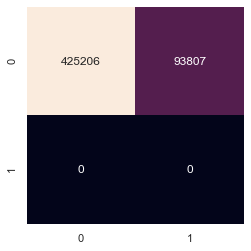

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False);

In [ ]:
## True = 1 False = 0
## este modelo clasifico correctamente 425.206 registros (tipo I)
## calsifico incorrectamente 93.807 registros como error tipo II - No rechazar Ho, cuando Ho es falsa